In [1]:
import scanpy as sc
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams,cm,colors
import matplotlib.font_manager
import numpy as np

/usr/local/lib/python3.6/dist-packages/numba/errors.py:104: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
#set plotting parameters
plt.rcParams['figure.figsize']=(8,8)
plt.rcParams['font.sans-serif'] = "Helvetica"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams.update({'font.size': 22})

In [3]:
## read in normalised data
adata = sc.read("../../output/adata_anno.h5ad")

In [9]:
def perform_de(adata, grouping):
    #calculate total genes
    total_genes = adata.shape[1]

    #calculate marker genes
    sc.tl.rank_genes_groups(adata, groupby=grouping,method='wilcoxon', key_added='rank_genes',n_genes = total_genes)
    sc.tl.filter_rank_genes_groups(adata, key = 'rank_genes',groupby=grouping)
    sc.pl.rank_genes_groups(adata, key='rank_genes', fontsize=12)

    #select top 5 marker genes for each cluster for dotplot
    #markers = pd.DataFrame(adata.uns['rank_genes_groups_filtered']['names']).head(10)
    #markers = markers.values.flatten(order = 'F')
    #markers = list(dict.fromkeys(markers)) 

    #make dotplot
    #plt.rcParams.update({'font.size': 15,'legend.fontsize':15})
    #ax = sc.pl.dotplot(adata, markers, groupby=grouping, save = "de_dotplot_all_glia_" + grouping)
    sc.pl.rank_genes_groups_dotplot(adata, key='rank_genes_groups_filtered', save = "de_dotplot_lung_" + grouping)
    de  = pd.DataFrame({'genes':[],'logfoldchanges':[],'pvals':[],'cluster':[]})
    for group in set(adata.obs[grouping]):
        d = {'genes': adata.uns['rank_genes']['names'][group],\
         'logfoldchanges': adata.uns['rank_genes']['logfoldchanges'][group],\
         'pvals':adata.uns['rank_genes']['pvals'][group],\
         'pvals_adj':adata.uns['rank_genes']['pvals_adj'][group],\
         'cluster':group}
        de = pd.concat([de,pd.DataFrame(d)])
    de.to_csv("../../output/wilcox_markers_grouping_" + grouping + ".csv")

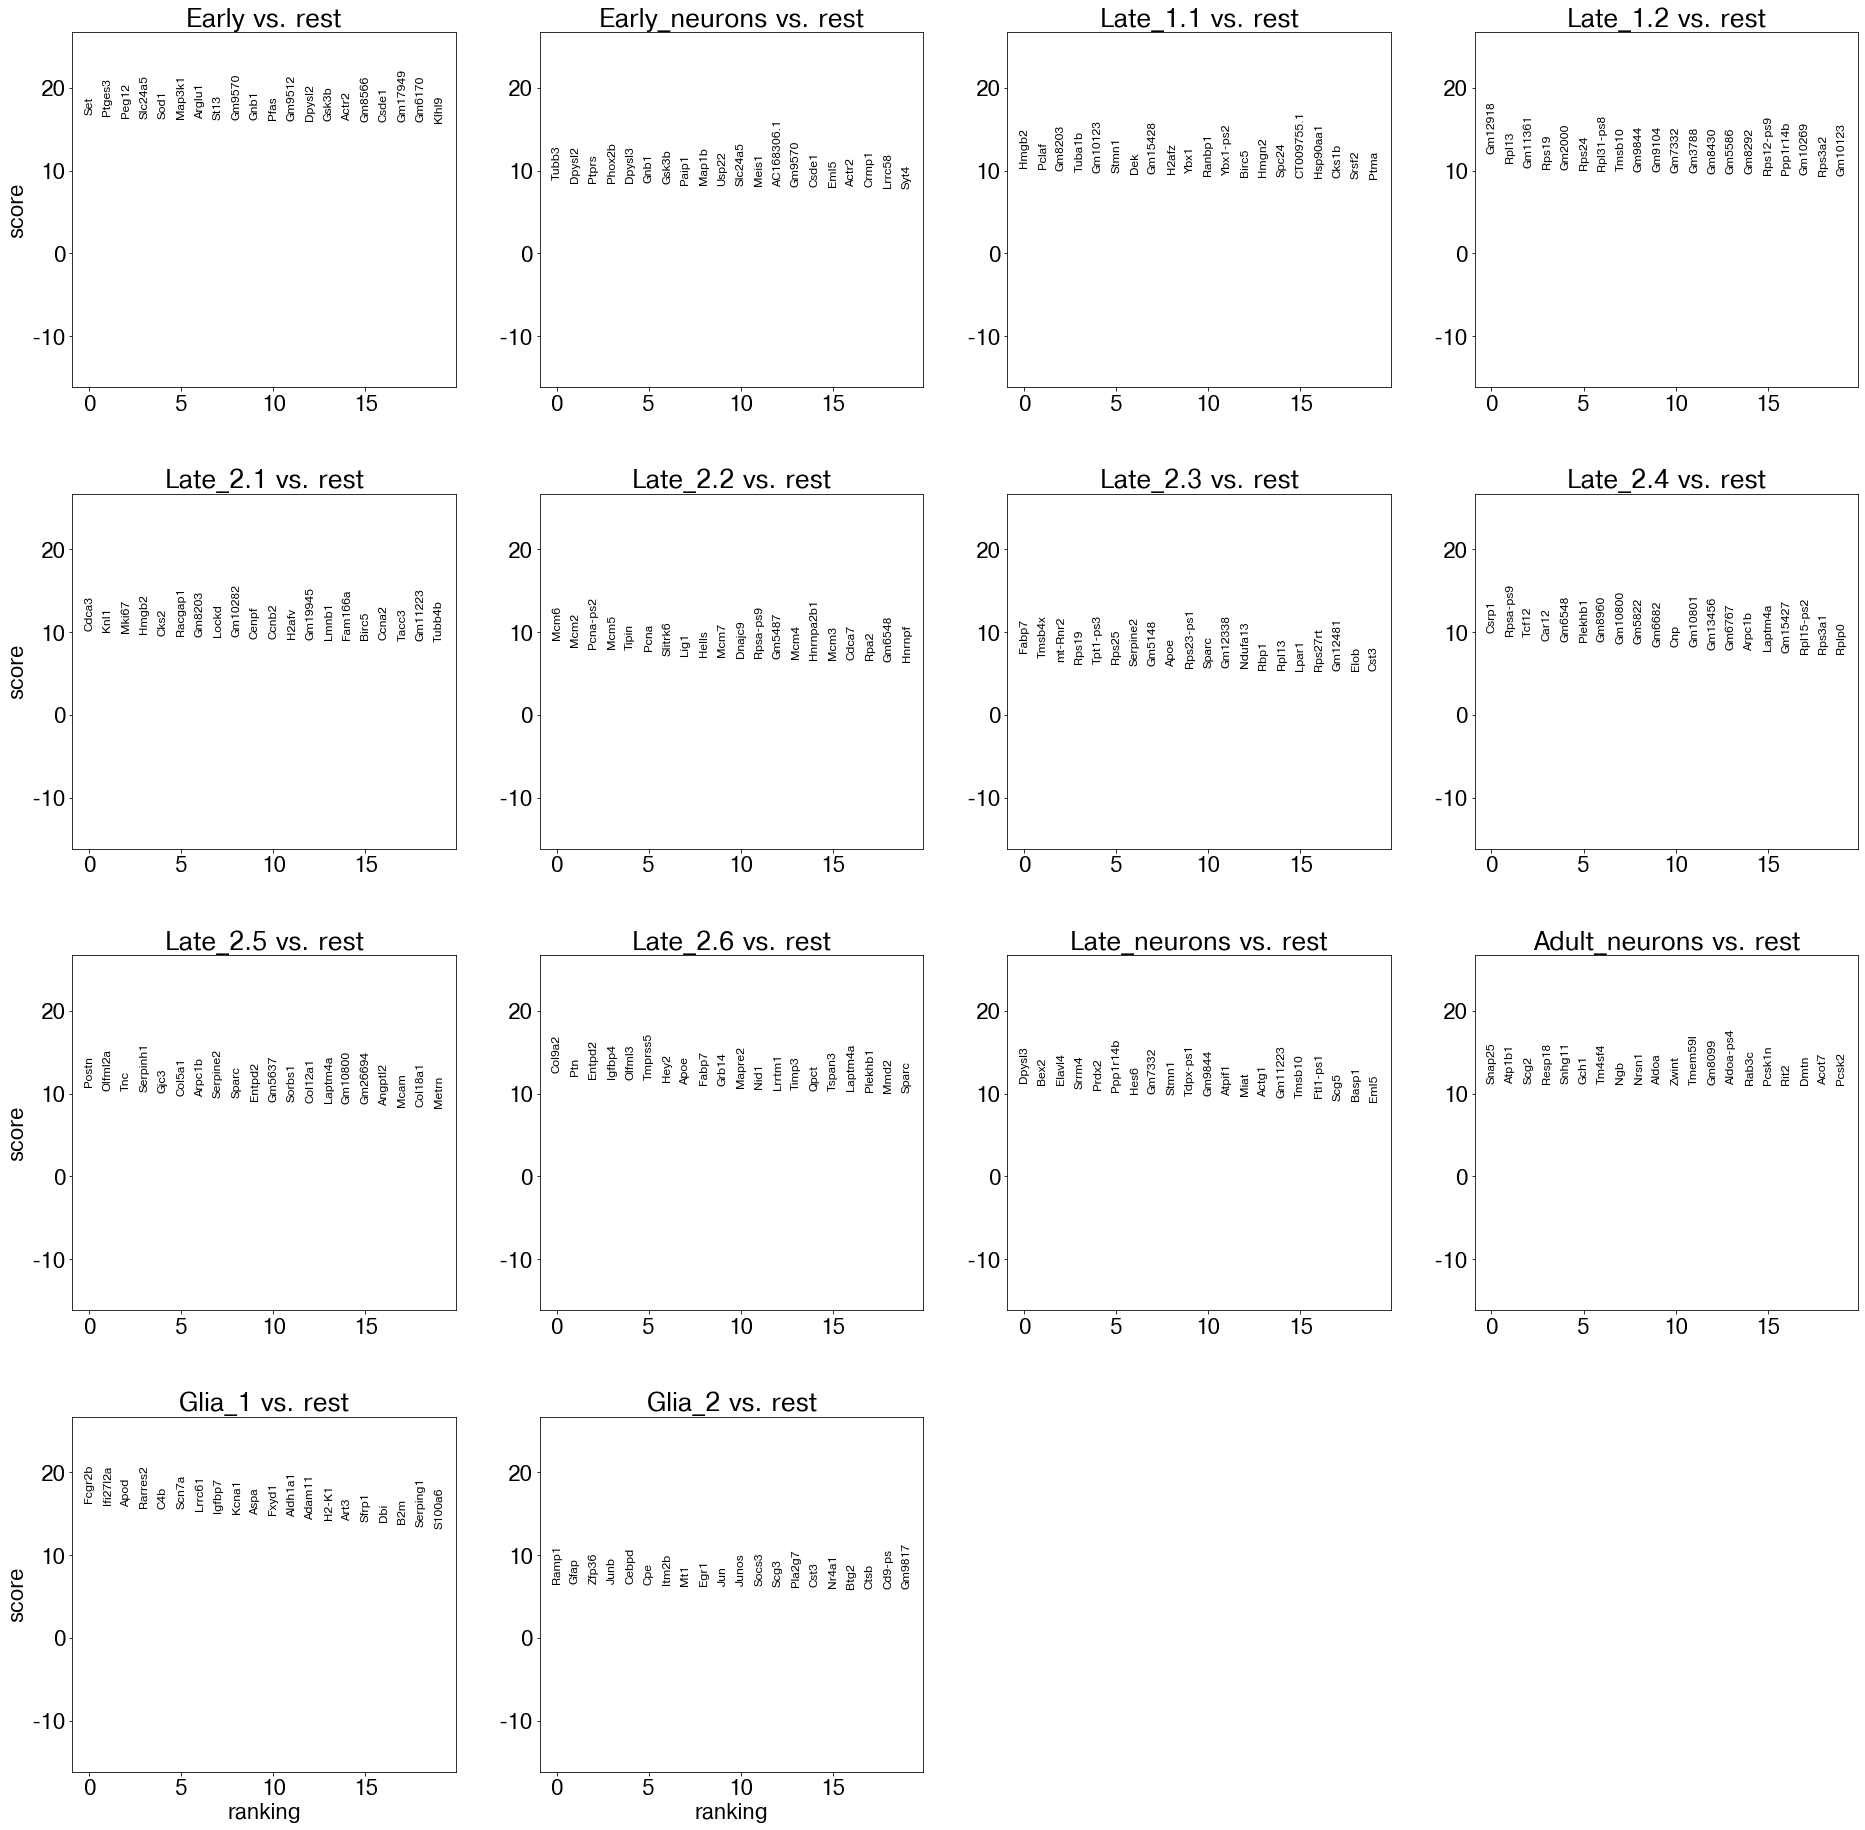

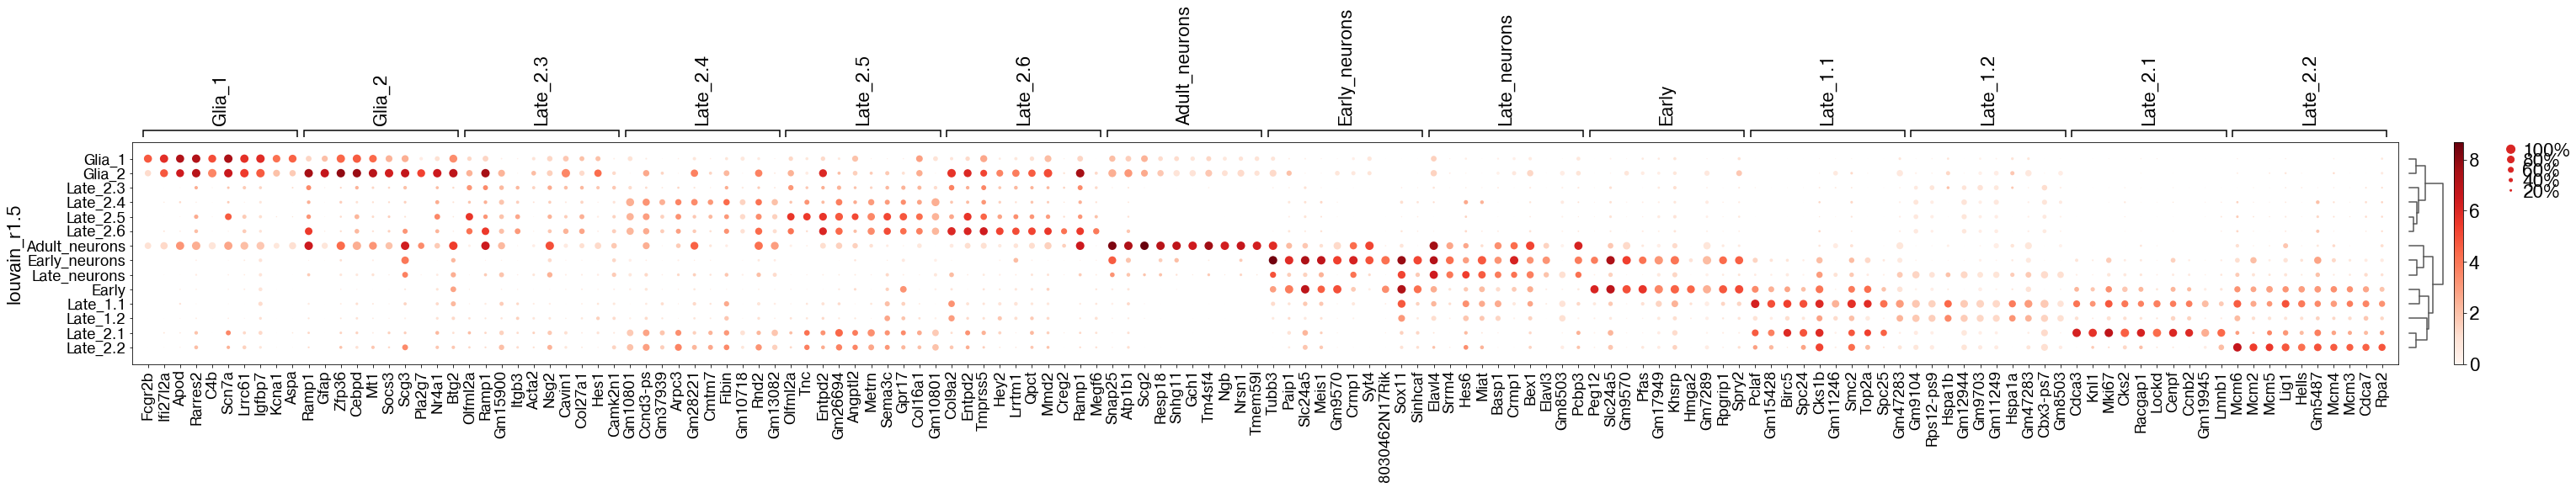

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [10]:
perform_de(adata, "louvain_r1.5")